In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct


In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
# Create the SQLAlchemy inspector and connect it to the engine
# This allows the inspection of database tables from my Python code 
inspector = inspect(engine)

In [20]:
# Use SQLAlchemy reflection to get the details of the Measurement table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Use SQLAlchemy reflection to get the details of the Station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [22]:
#select the first row for measurement
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ac16e00>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [23]:
#select the first row for station
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ab9ba30>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1}

In [24]:
for row in session.query(Measurement.date).limit(5).all():
    print(row)


('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [25]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f'The most recent date in the data set is {recent_date}')

The most recent date in the data set is ('2017-08-23',)


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, twelve month backward from 2017-08-23 . 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


last_twelveth_month = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()



In [26]:
# Perform a query to retrieve the data and precipitation scores
last_twelveth_month

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_results = pd.DataFrame(last_twelveth_month, columns = ["Measurement Date", "Precipitation"])

prcp_results.set_index("Measurement Date", inplace=True)

prcp_results

,Precipitation
Measurement Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [29]:
#drop NA in the precipitation columns
prcp_results=prcp_results.dropna()
prcp_results

,Precipitation
Measurement Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [30]:
#validate the data type of the dataframe
prcp_results.dtypes

Precipitation    float64
dtype: object

In [31]:
# convert date column to datetime for formatting in plot

prcp_results.index = pd.to_datetime(prcp_results.index, format="%Y/%m/%d")

In [32]:
# Sort the dataframe by date

prcp_results=prcp_results.sort_values(by='Measurement Date')

prcp_results.head(10)

,Precipitation
Measurement Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


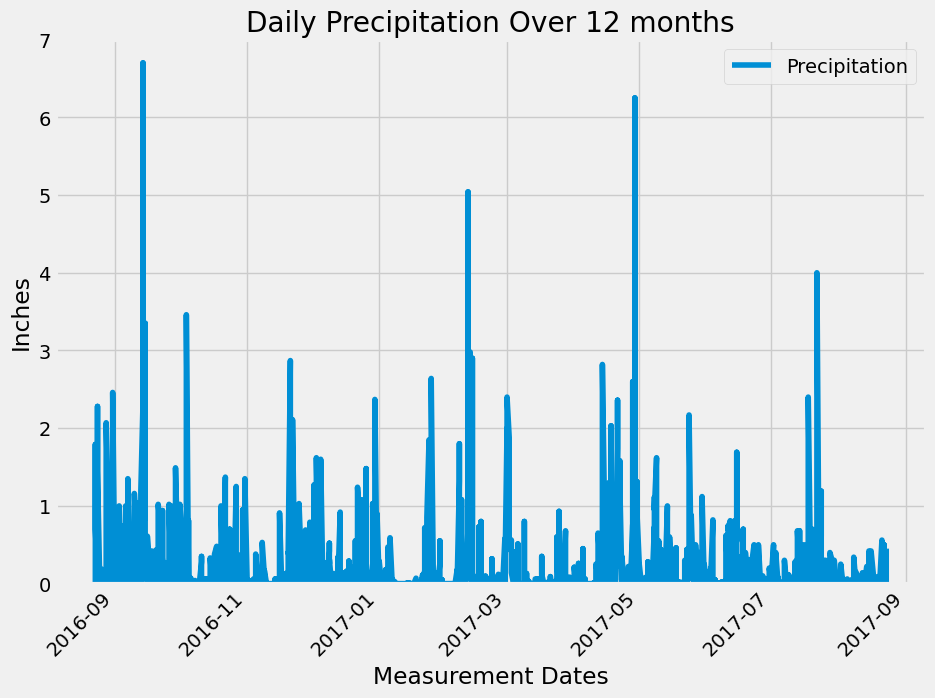

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_results_plot = prcp_results.plot(figsize=(10,8), ylim=(0,7), title = "Daily Precipitation Over 12 months", rot=45)
prcp_results_plot.set_ylabel("Inches")
prcp_results_plot.set_xlabel("Measurement Dates")
# prcp_results_plot.grid()
plt.legend(loc='best')
plt.savefig("Precipitation analysis.png")
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_statistics = prcp_results["Precipitation"].to_frame()
precipitation_statistics.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_statistics_table = prcp_results.groupby('Measurement Date').agg({'Precipitation' : ['mean', 'median','var','std','sem']})
precipitation_statistics_table

Precipitation                                     
                          mean median       var       std       sem
Measurement Date                                                   
2016-08-23            0.451667  0.100  0.499097  0.706468  0.288414
2016-08-24            1.555000  1.800  0.706510  0.840541  0.343150
2016-08-25            0.077143  0.080  0.005157  0.071813  0.027143
2016-08-26            0.016667  0.015  0.000267  0.016330  0.006667
2016-08-27            0.064000  0.020  0.006680  0.081731  0.036551
...                        ...    ...       ...       ...       ...
2017-08-19            0.030000  0.000  0.002700  0.051962  0.030000
2017-08-20            0.005000  0.005  0.000050  0.007071  0.005000
2017-08-21            0.193333  0.020  0.100933  0.317700  0.183424
2017-08-22            0.166667  0.000  0.083333  0.288675  0.166667
2017-08-23            0.132500  0.040  0.046225  0.215000  0.107500

[366 rows x 5 columns]

# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).filter(Station.id).count()
print(f'The total number stations in the dataset is {total_stations}.')


The total number stations in the dataset is 9.


In [37]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations[0][0]
print("The most active station id is ",most_active_station,".")

The most active station id is  USC00519281 .


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print("The lowest temperature recorded for station 'USC00519281' is ",lowest_temp )
print("The highest temperature recorded for station 'USC00519281' is ",highest_temp)
print("The average temperature recorded for station 'USC00519281' is ",average_temp)

The lowest temperature recorded for station 'USC00519281' is  [(54.0,)]
The highest temperature recorded for station 'USC00519281' is  [(85.0,)]
The average temperature recorded for station 'USC00519281' is  [(71.66378066378067,)]


In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12months = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

In [42]:
station_temp_df = pd.DataFrame(data=last_12months).set_index('date')
station_temp_df 
# station_temp_df.dropna()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


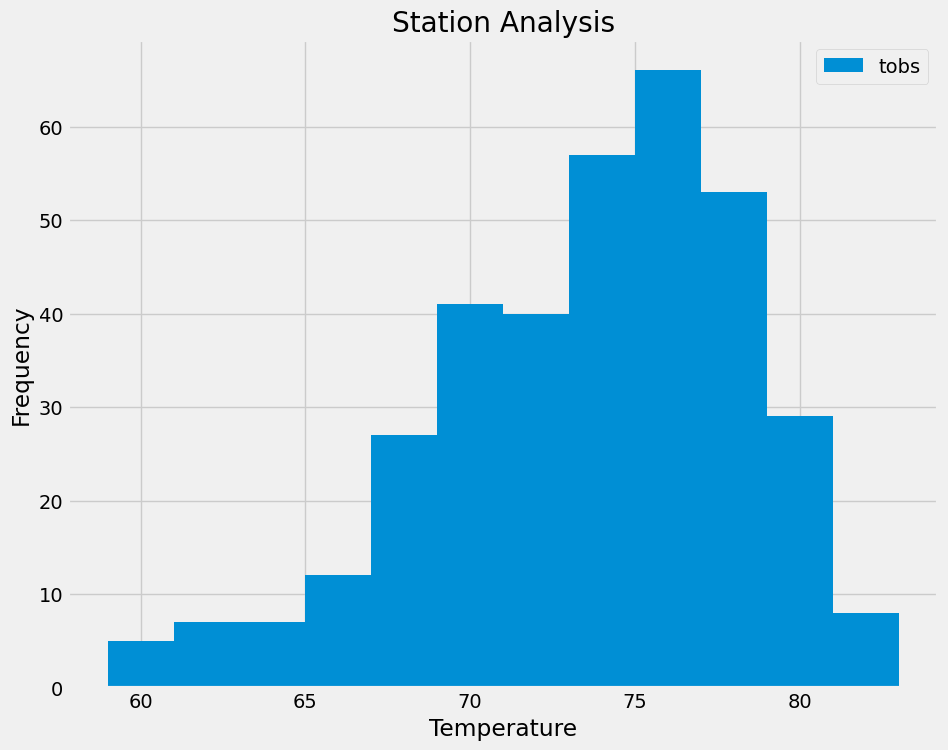

In [43]:
# plot the results as a histogram
plt.figure(figsize=(10,8))
plt.hist(station_temp_df ['tobs'], bins = 12)
# plt.grid()
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.savefig("Station analysis.png")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close Session

In [44]:
# Close Session
session.close()